In [42]:
import numpy as np
import colorsys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import BarChart_plt
%matplotlib inline
#load data
df = pd.read_csv('vgsales.csv')

class trends(object):
    def __init__(self, df):
        assert isinstance(df, pd.core.frame.DataFrame)
        assert 'Year' in df
        #Cleaning data. only save data before 2016
        df=df[df['Year'] <= 2016]
        
        #rename Platform label
        df["Platform" ] = df["Platform"].replace(["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB", "XOne", "PSV", "TG16", "3DO", "PCFX"],
            ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360","Super Nintendo Entertainment System","Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation","Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16","3DO Interactive Multiplayer", "NEC PC‑FX"])
        PlayStation = ['PS3', 'PS4', 'PS2', 'PlayStation', 'PSP', 'PlayStation Vita']
        Nintendo = ['Wii', 'Nintendo Entertainment System', 'Game Boy','Nintendo DS', 'Super Nintendo Entertainment System', 'Nintendo Game Boy Advance','Nintendo 3DS', 'Nintendo 64','WiiU']
        Microsoft = ['Xbox', 'Xbox One', 'Xbox 360']
        Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TurboGrafx-16', '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX']
        #plot total sales on different regions.
        return BarChart_plt.mul_barchart(df)


class trends1(object):
    """
    Plot Top 10 Most Sales Game by Regions
    """
    def __init__(self, df):
        assert isinstance(df, pd.core.frame.DataFrame)
        assert 'Year' in df
        return BarChart_plt.bar_grid(df1,"Top 10 Most Sales Game by Regions")

class trends2(object):
    """
    Plot Top 10 Average Most Sales Game by Regions
    """
    def __init__(self, df):
        #rename columns with understandable name tage
        df2=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe","JP_Sales": "Japan","Other_Sales": "Other"})
        #only take top 1000 games sales into calculatoin
        df2=df2.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=False).head(1000)
        #calculate avergae salses of top 10 sale games
        df2['Ave'] = df2['Global_Sales']/(2017-df2['Year'])
        df2=df2.loc[:, 'Name': 'Ave'].sort_values(by="Ave", ascending=True).tail(10)
        return BarChart_plt.bar_grid(df2,"Top 10 Average Most Sales Game by Regions")

class trends3(object):
    '''
    Plot Comparison of Global Sales for Platfrom Types in Two Time Spans
    '''

    def __init__(self, df):
        def Platf (c):
            '''
            Merge platform into larger category
            input: Panda dataframe
            '''
            if c['Platform'] in PlayStation:
                return 'PlayStation'
            elif c['Platform'] in Nintendo:                
                return 'Nintendo'
            elif c['Platform'] in Microsoft:
                return 'Microsoft'
            elif c['Platform'] in Other:
                return 'Other'
            else:
                return 'Outflit'
        df['Platf'] = df.apply(Platf, axis=1)
        #deviede data to before 2011 and data after 2011
        before=df[(df["Year"]>=2005) & (df["Year"]<2011)].groupby("Platf")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

        after=df[(df["Year"]>=2011) & (df["Year"]<2017)].groupby("Platf")['Global_Sales'].sum().sort_values(ascending = False).reset_index()
        return BarChart_plt.comp_bar(before,after,"c")



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


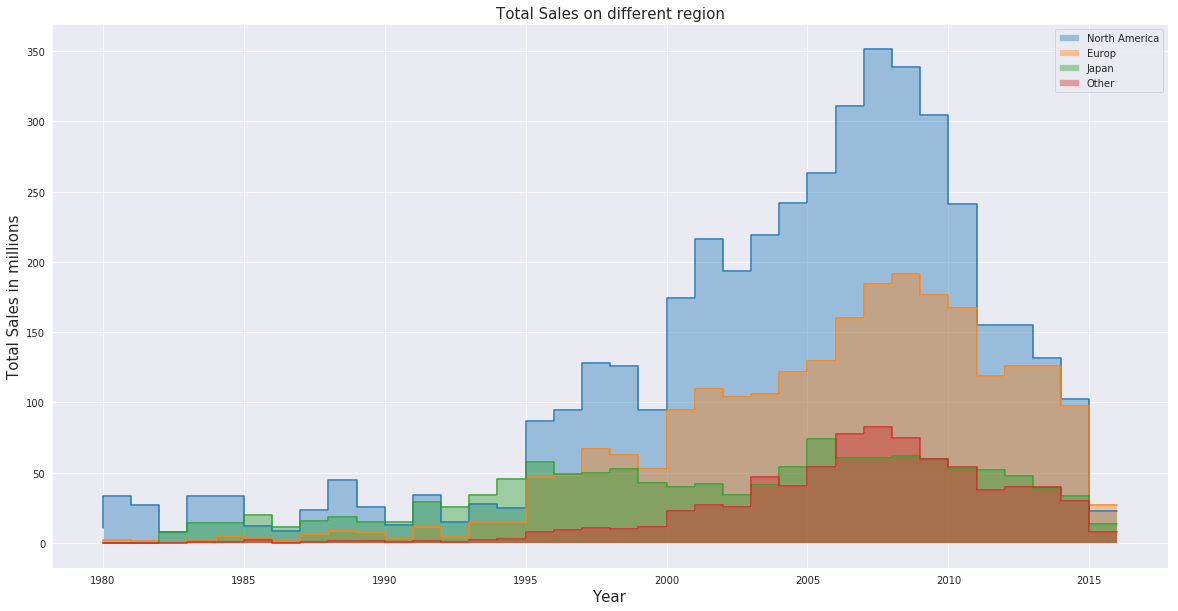

In [25]:
trends(df)

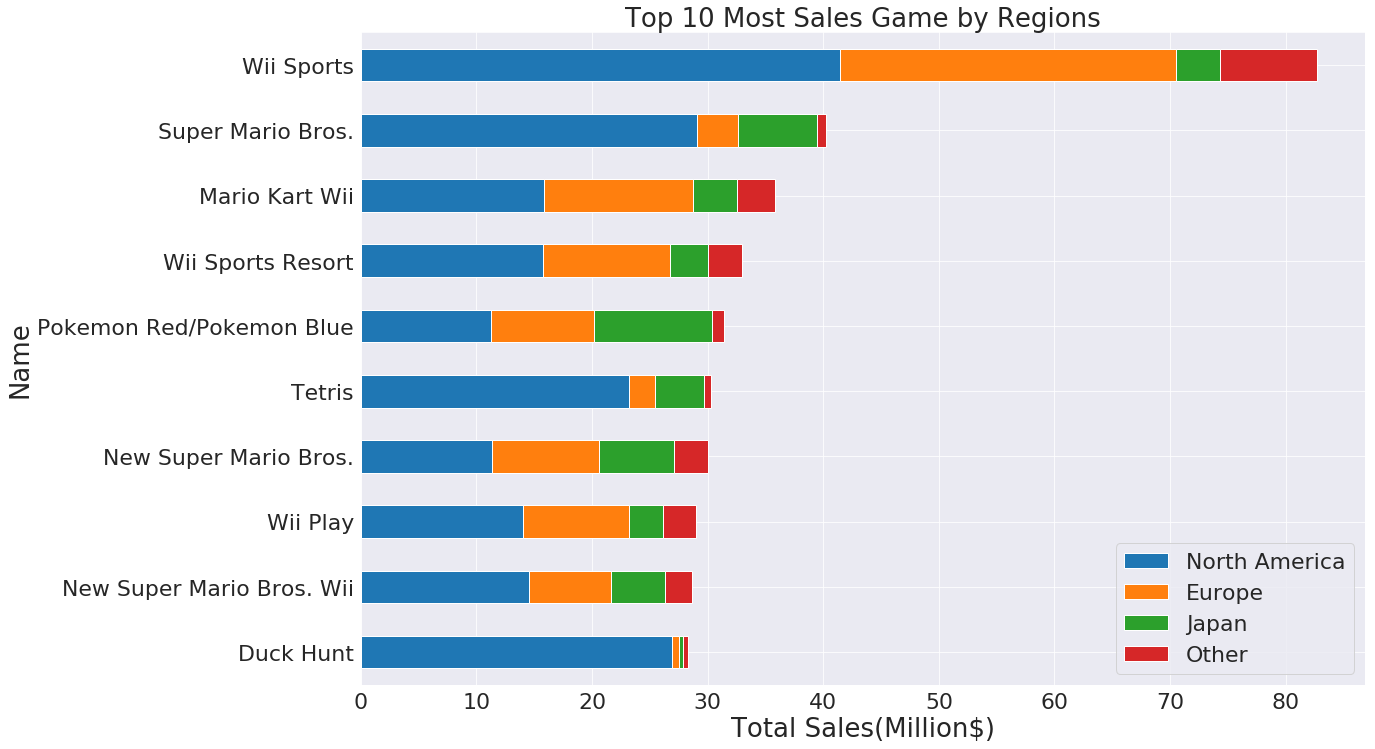

In [28]:
trends1(df)

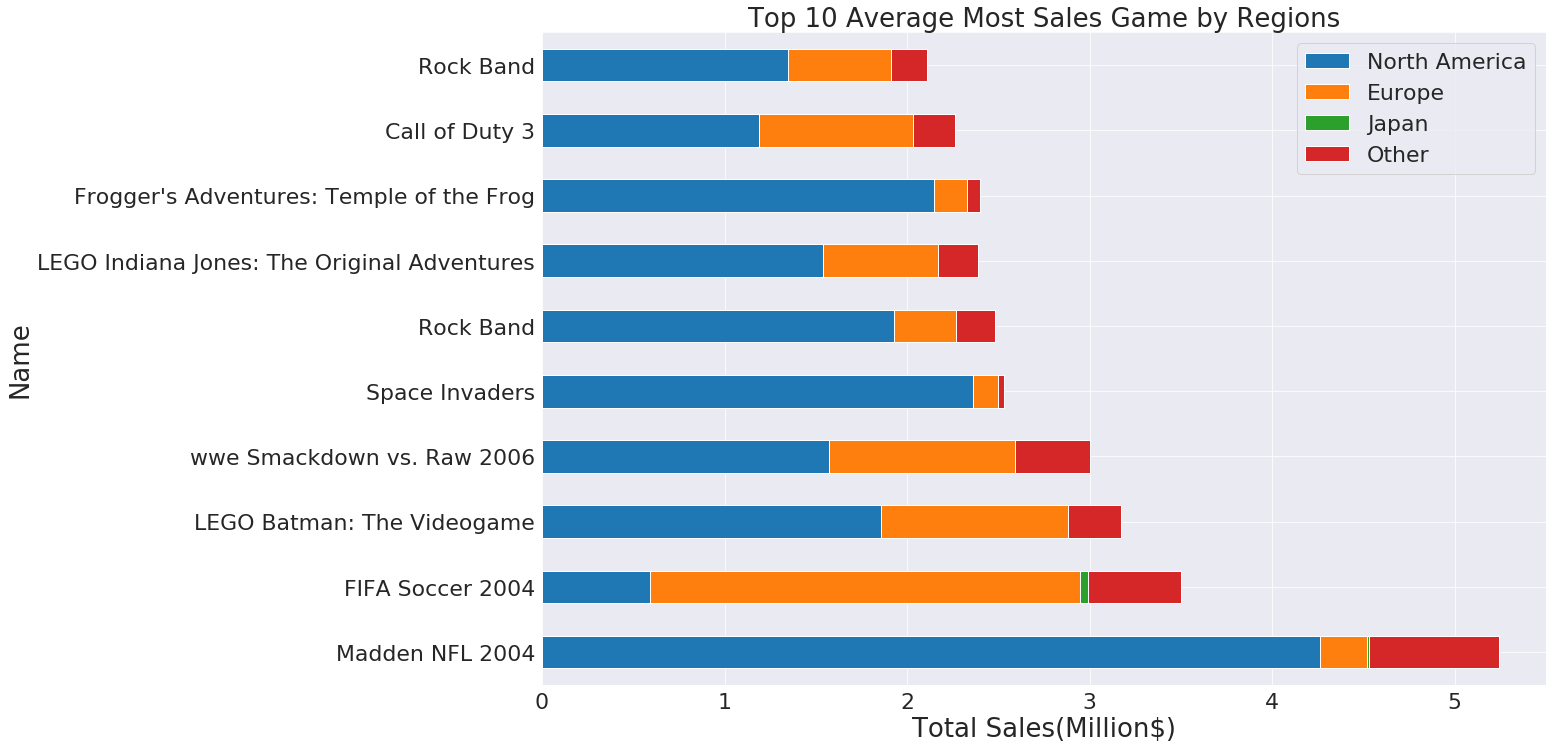

In [35]:
trends2(df)

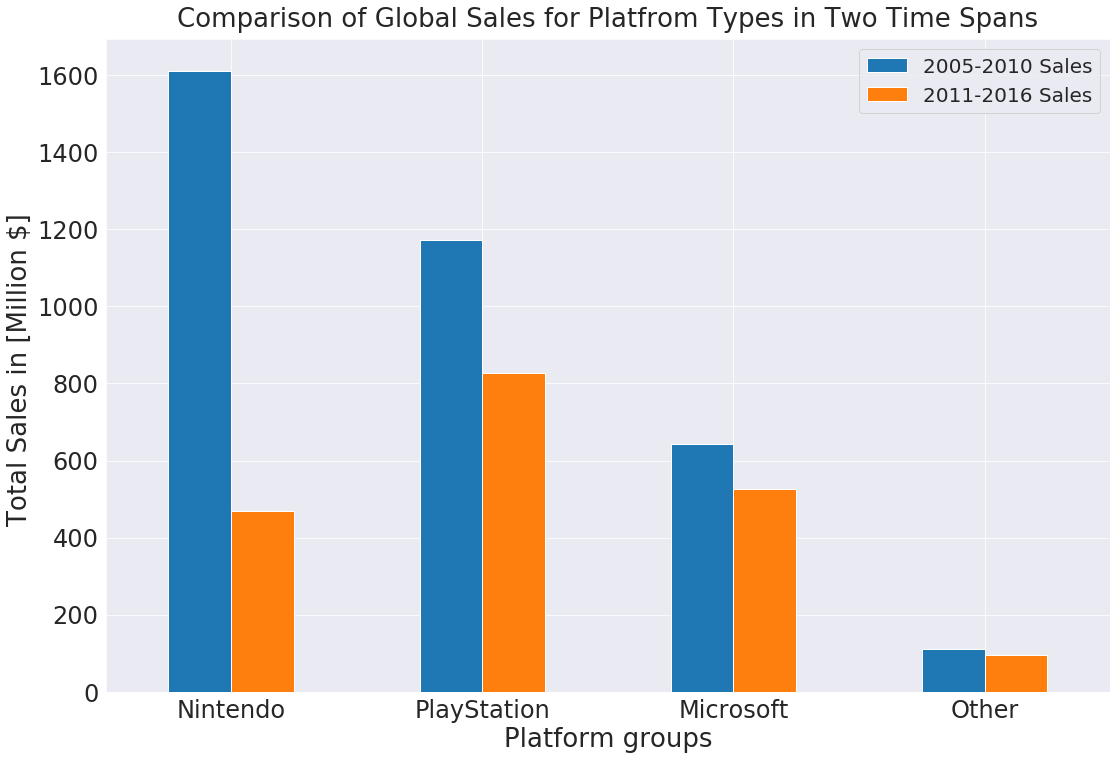

In [14]:
#deviede data to before 2011 and data after 2011
before=df[(df["Year"]>=2005) & (df["Year"]<2011)].groupby("Platf")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

after=df[(df["Year"]>=2011) & (df["Year"]<2017)].groupby("Platf")['Global_Sales'].sum().sort_values(ascending = False).reset_index()
BarChart_plt.comp_bar(before,after,"Comparison of Global Sales for Platfrom Types in Two Time Spans")

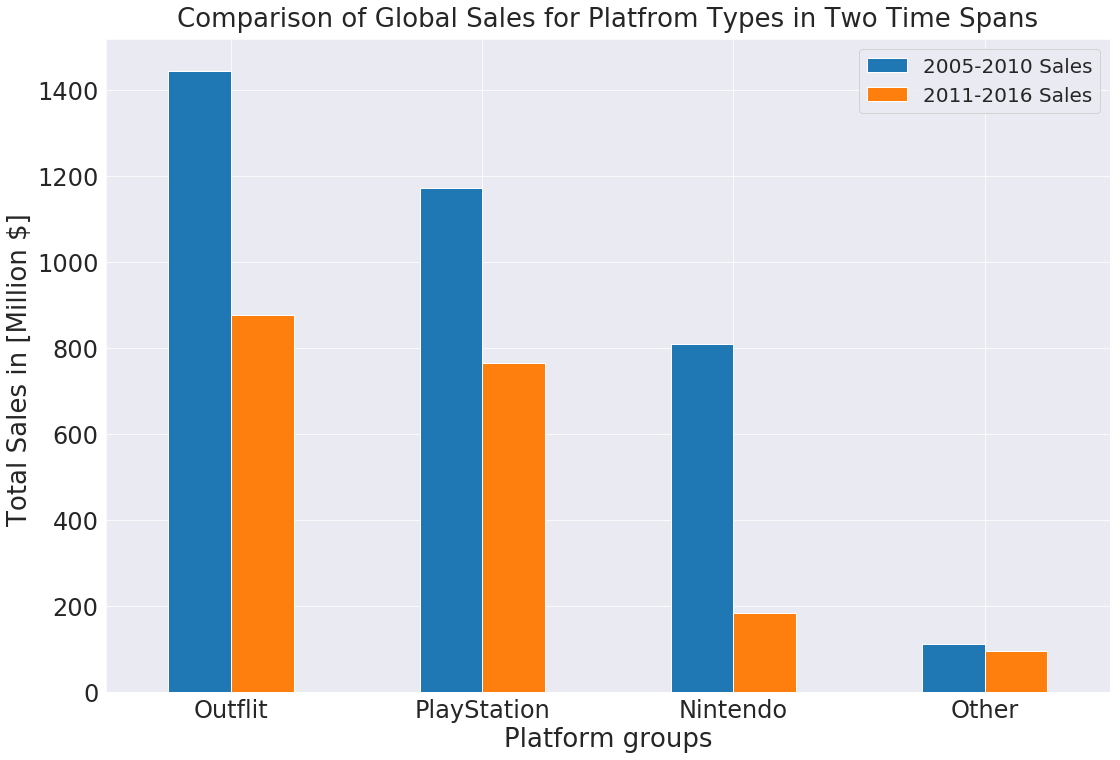

In [43]:
trends3(df)